In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import randn

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from eye_image import eye_image
from isi import isi
from noise import noise
from send import send
from send_wuma import send_wuma
from xishu import xishu
from source import source

set_printoptions(precision=5)
set_printoptions(suppress=True)

eps = finfo(float).eps

In [4]:
# global d
# global st
# global t
# global tt
# global sum
# global N_data
# global N_sample
# global sum_2
# global sum_3
# global st_2
# global N_data_2

Ts = 1
N_sample = 128
eye_num = 2
alpha = 1
N_data = 100
dt = Ts / N_sample

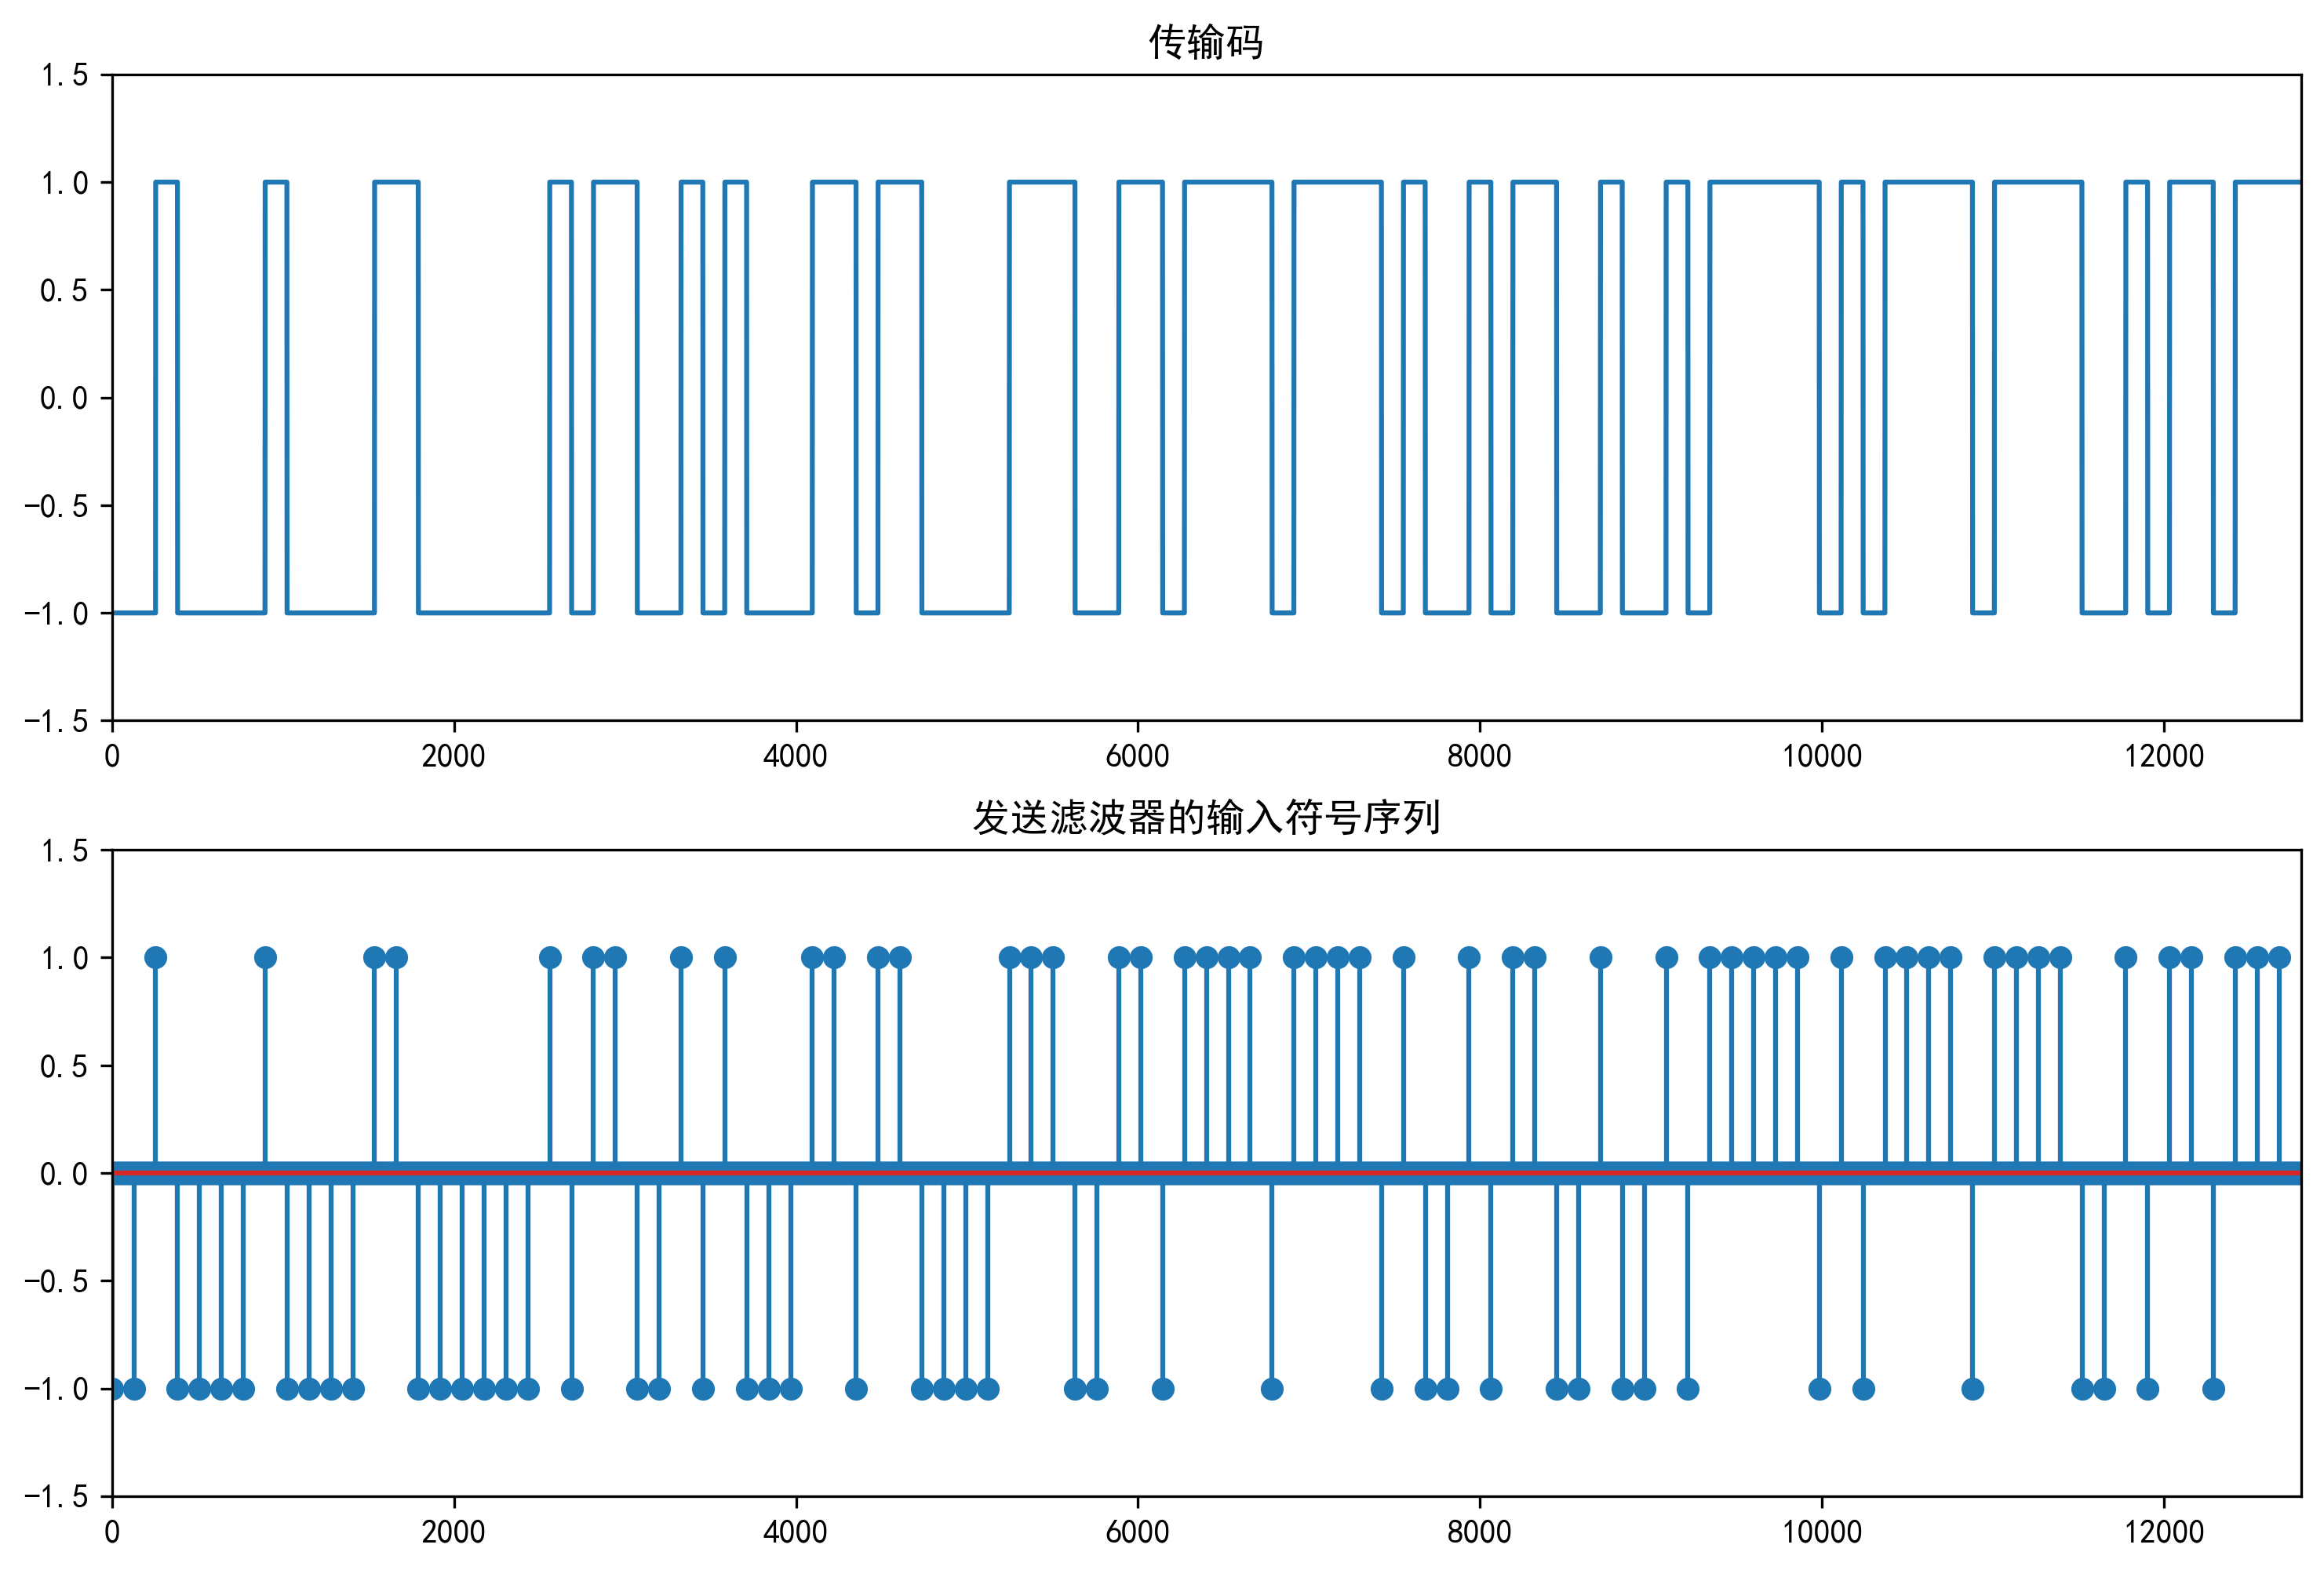

In [5]:
# **********信源信号************
d, dd, se = source(N_data, N_sample)
plt.figure(num=1, figsize=(12, 8), dpi=200)
plt.subplot(211)
plt.plot(se)
plt.axis([0, se.size, -1.5, 1.5])
plt.title('传输码')
# hold('on')
plt.subplot(212)
# print(dd)
plt.stem(range(0, dd.size), dd, linefmt=".", )
plt.axis([0, dd.size, -1.5, 1.5])
plt.title('发送滤波器的输入符号序列')
plt.show()

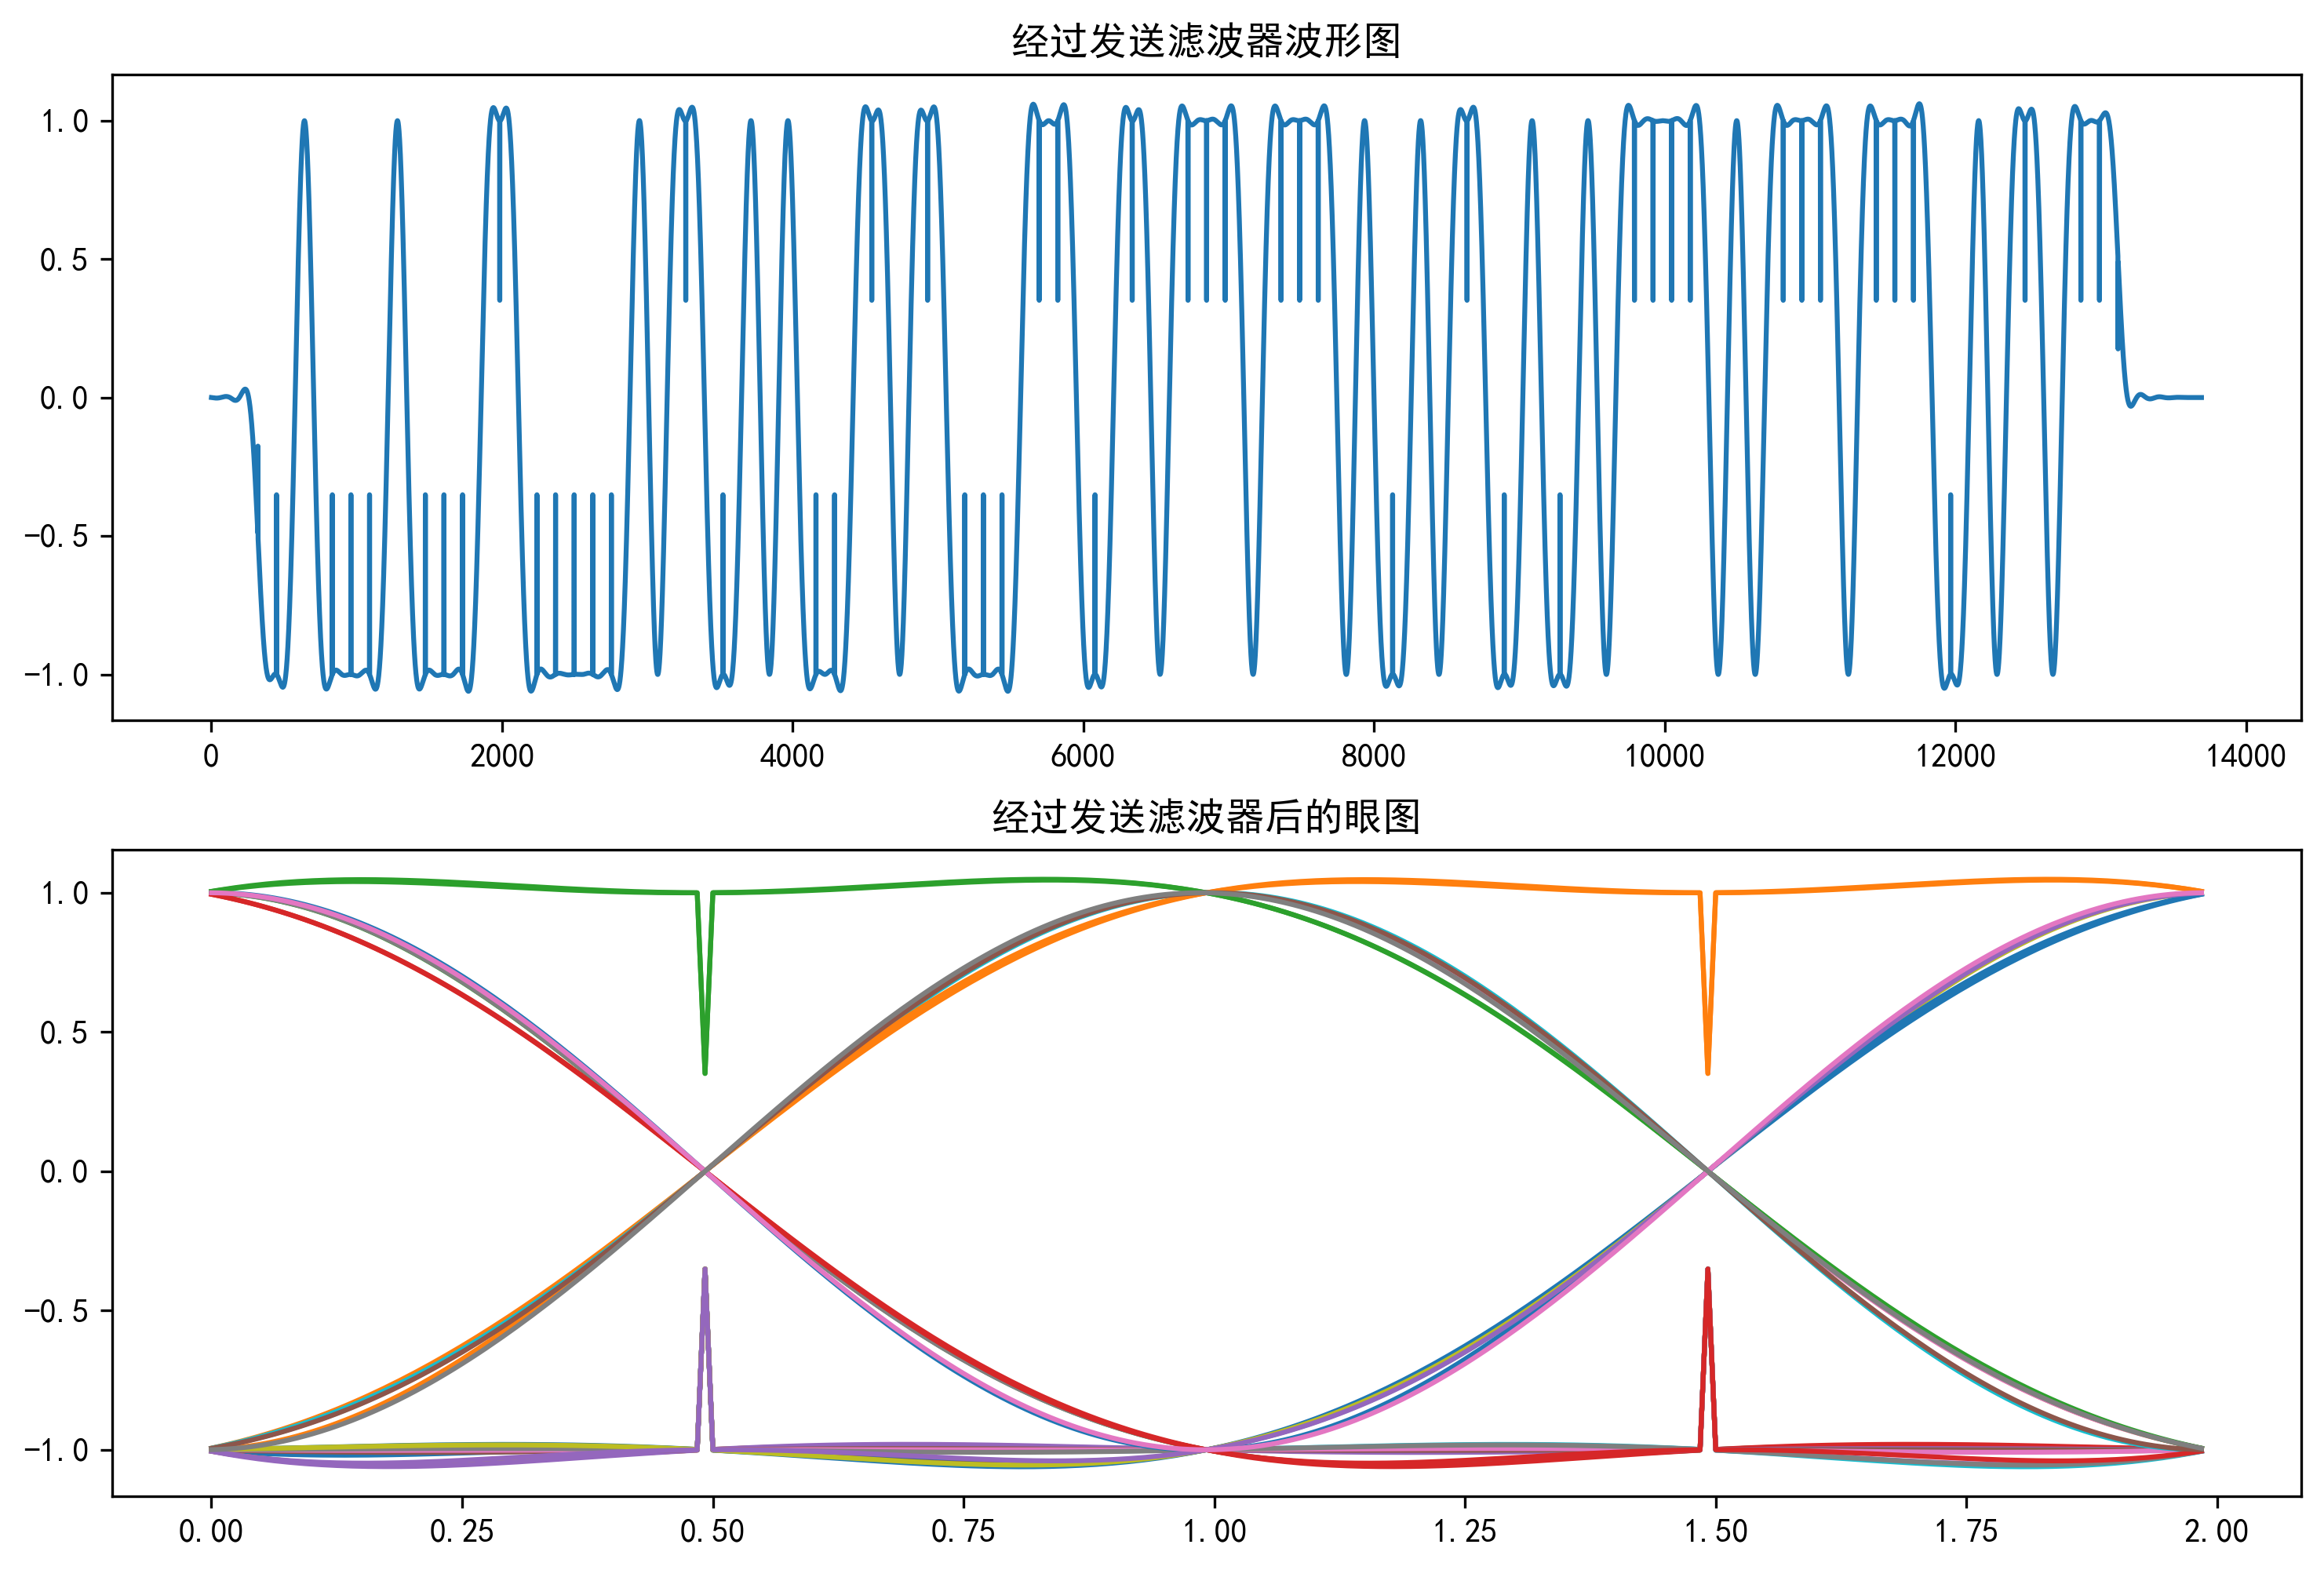

In [6]:
# **********发送滤波器************
t = arange(dot(-3, Ts), dot(3, Ts) + 1, dt)
st = send(dd, dt, Ts, alpha, N_data, N_sample)
# print(st.shape)
plt.figure(num=2, figsize=(12, 8), dpi=200)
plt.subplot(211)
plt.plot(st)
plt.title('经过发送滤波器波形图')
# # ************眼图**************
eye_image(st, eye_num, dt, N_data, N_sample)
plt.title('经过发送滤波器后的眼图')
plt.show()

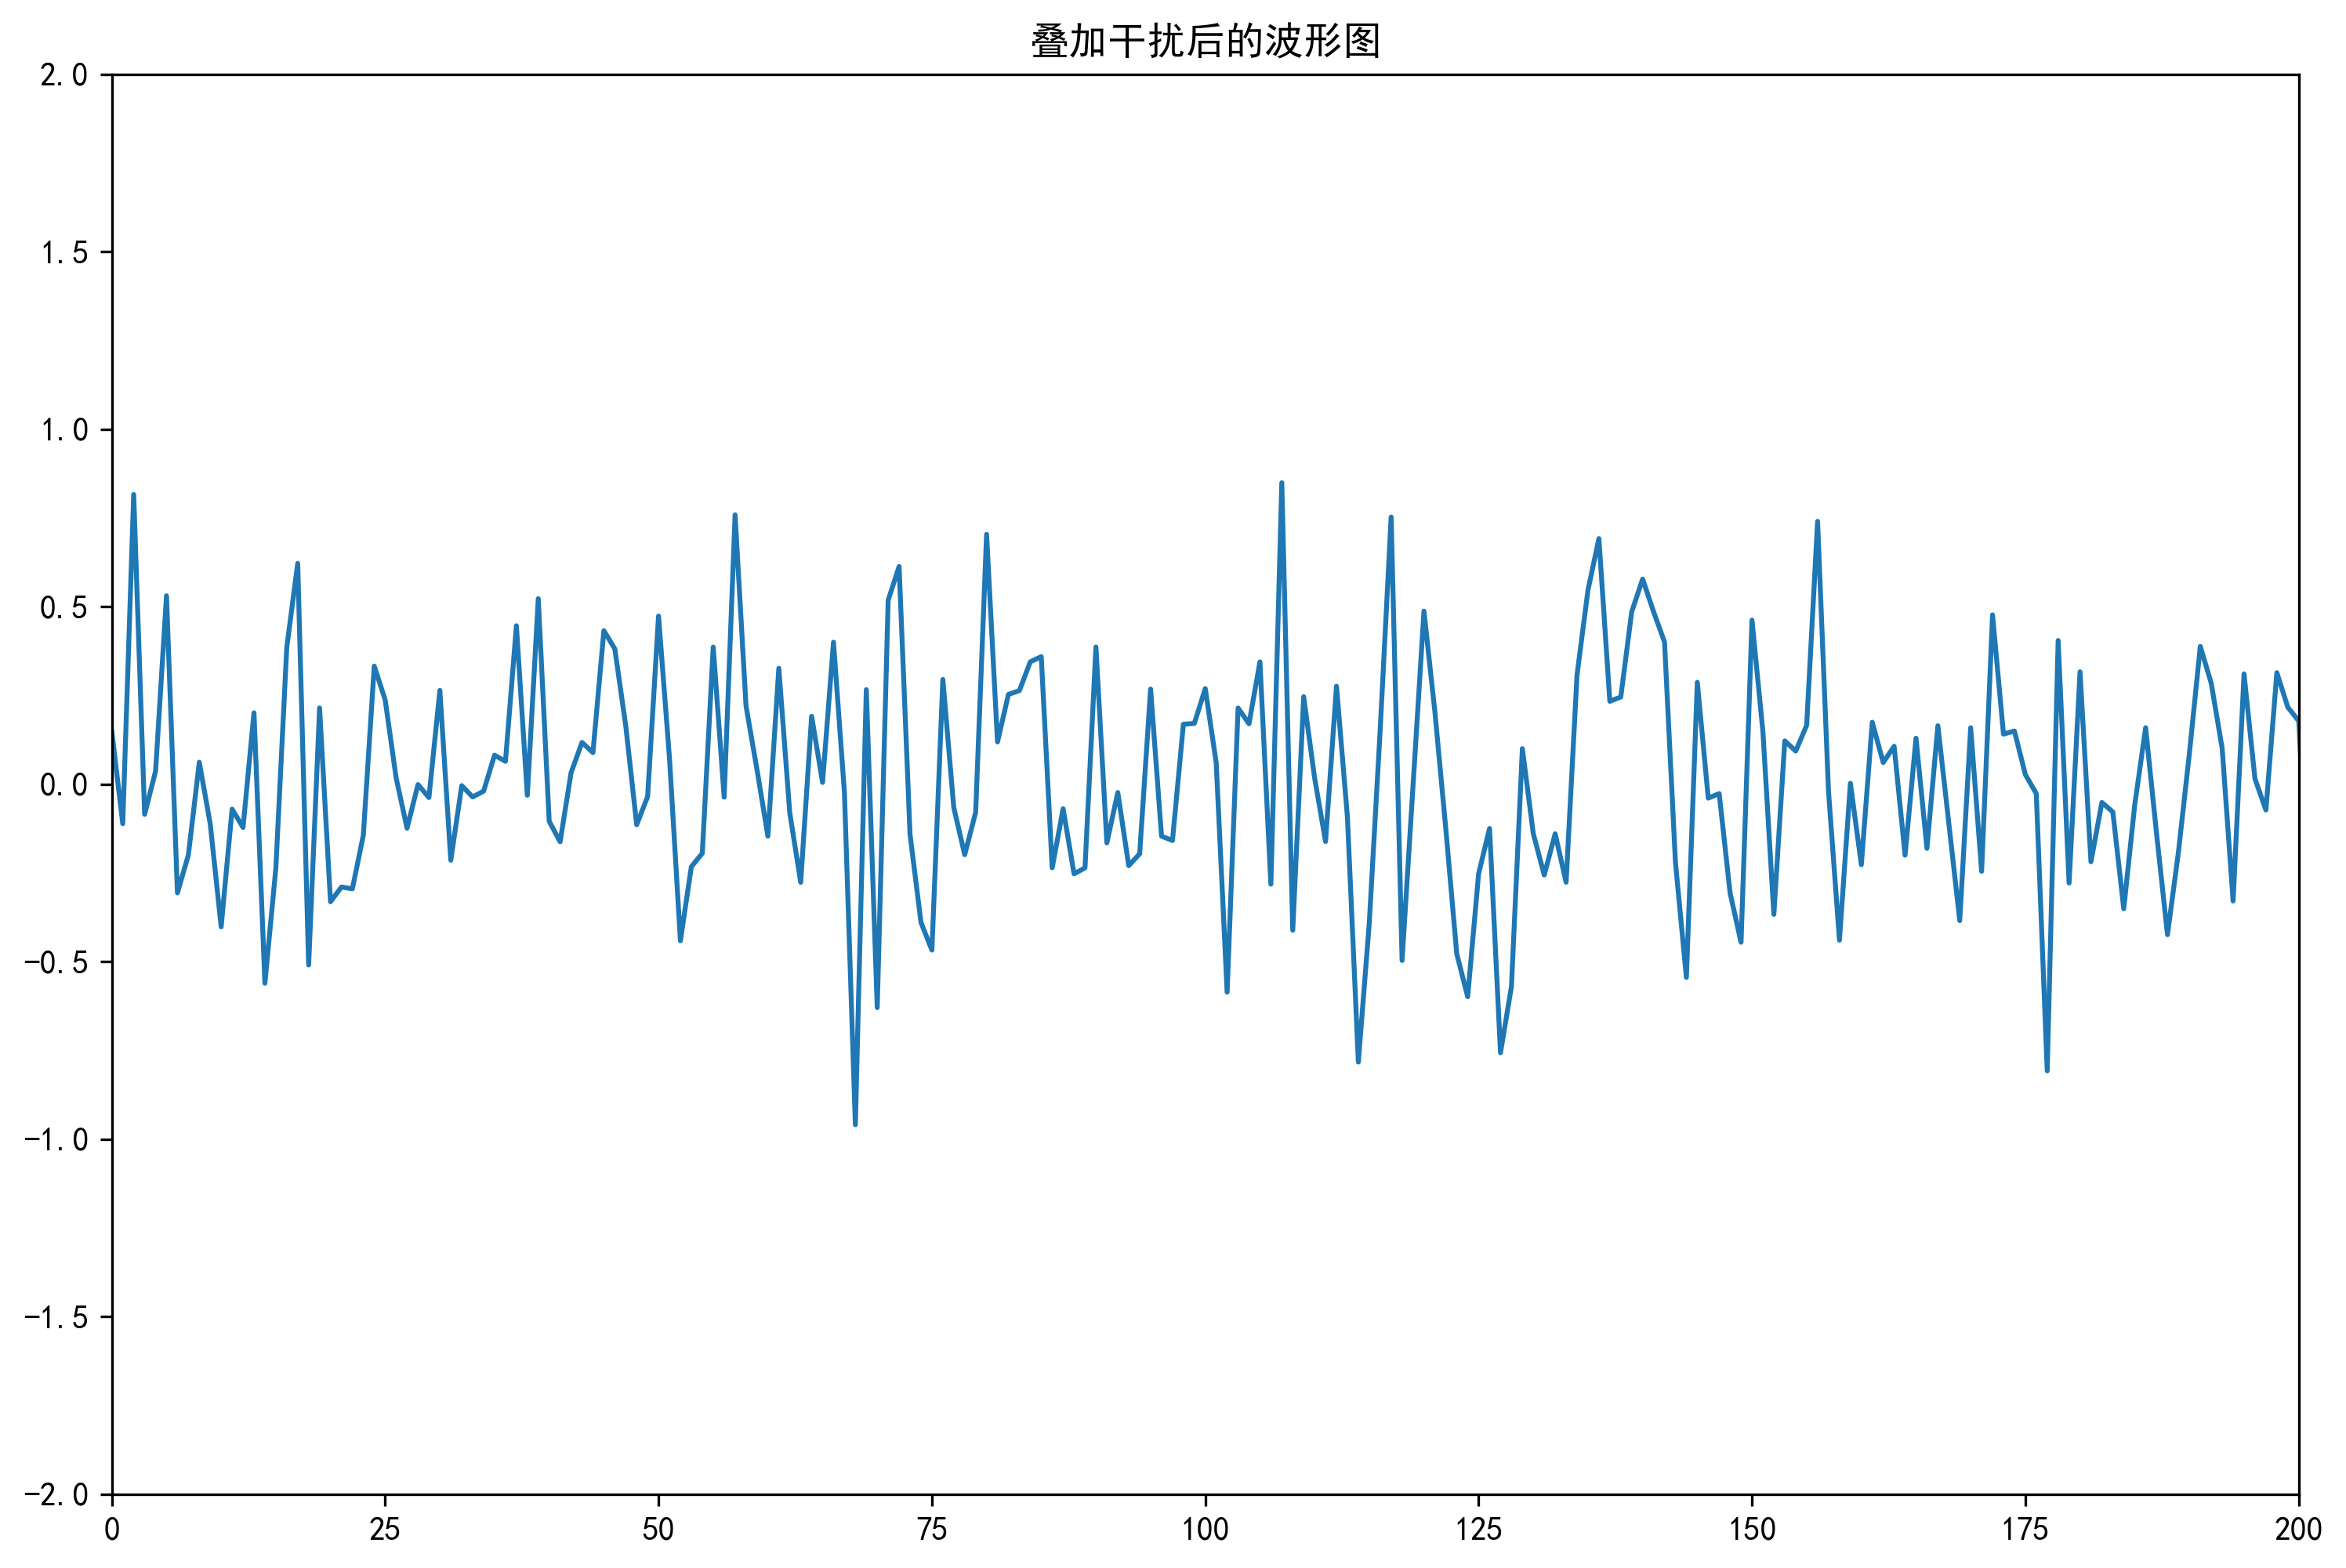

In [7]:
# **********码间干扰************
H = isi(st)
t_H = arange(-3, 103.0703125 + 1, dt)
# **********叠加噪声************
SNR = 6
st_y = noise(H, SNR)
plt.figure(num=3, figsize=(12, 8), dpi=200)
plt.plot(st_y)
plt.title('叠加干扰后的波形图')
plt.axis([0, 200, -2, 2])
plt.show()

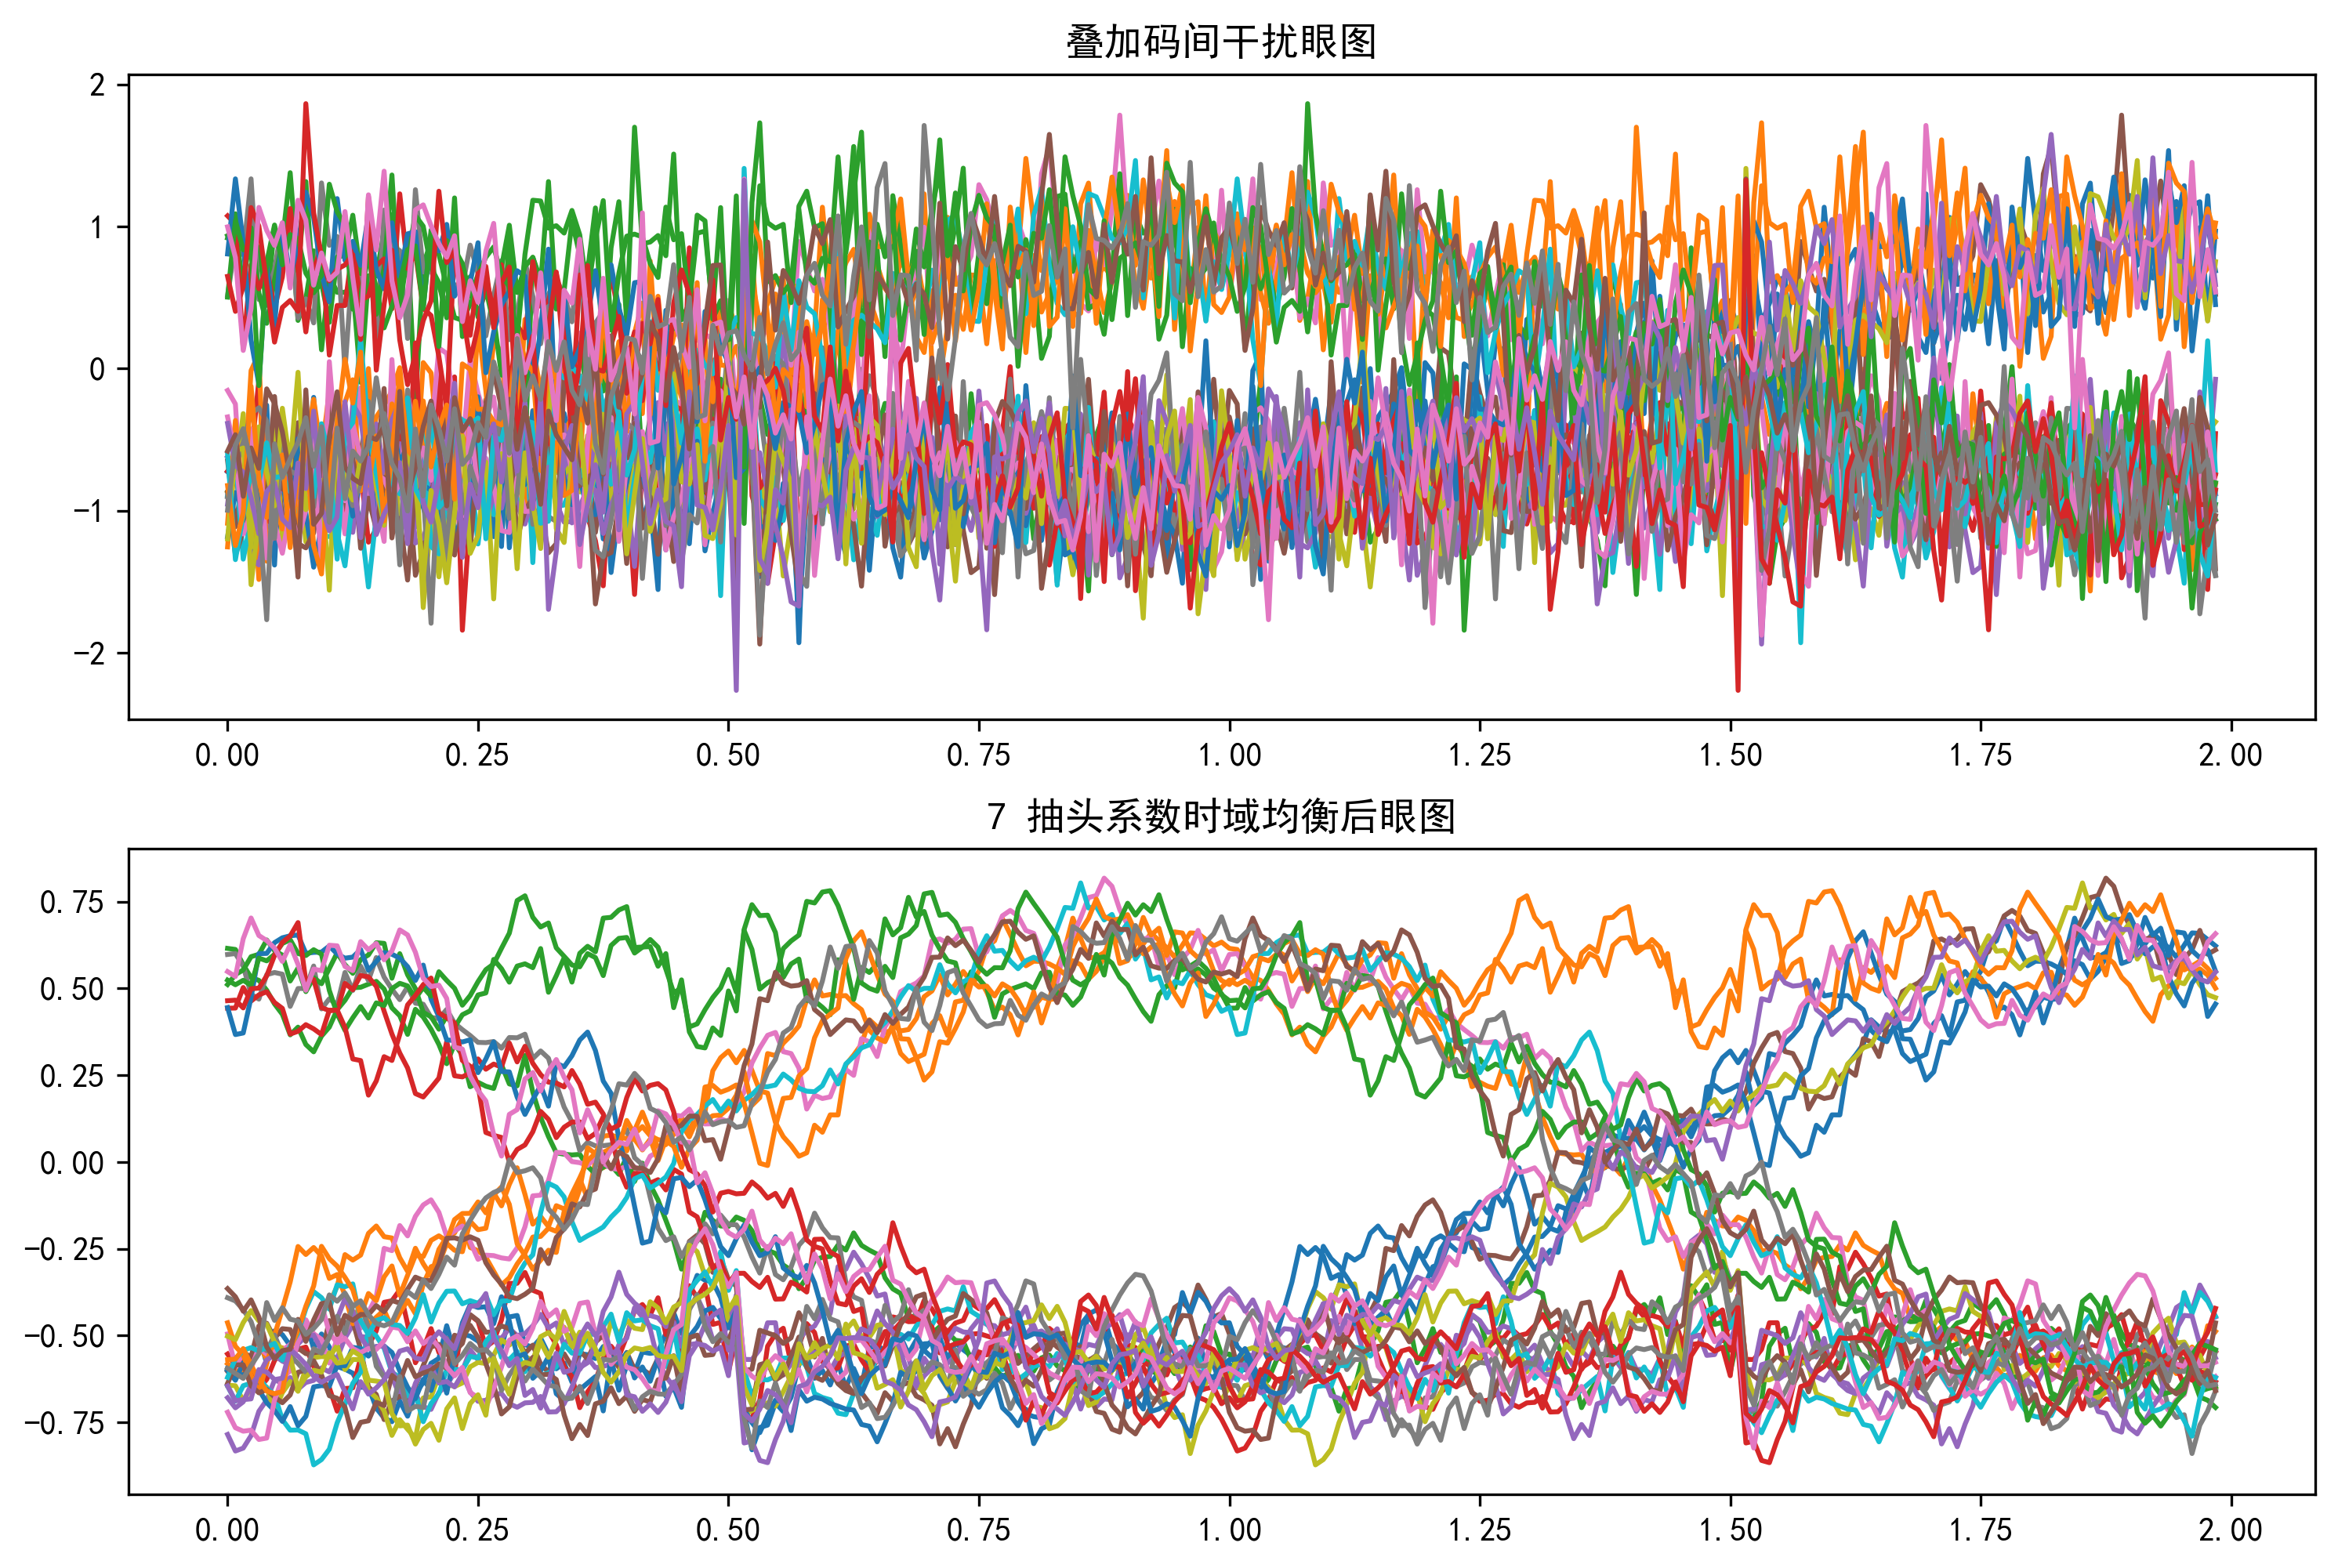

In [8]:
# ************眼图**************
s2 = zeros((1, dot(eye_num, N_sample)))
ttt = arange(0, dot(dot(eye_num, N_sample), dt) - dt, dt)
plt.figure(num=4, figsize=(12, 8), dpi=200)
for k in range(3, 30 + 1):
    s2 = st_y[dot(k, N_sample) + 1:dot((k + eye_num), N_sample)]
    plt.subplot(211)
    plt.plot(ttt, s2)
    plt.title('叠加码间干扰眼图')
# ****************时域均衡 M 为 7*******************
M = 7
w1 = xishu(SNR, M)
NN = len(st)
out_m11 = []
for n in range(M, NN + 1):
    z1 = st_y[arange(n, n - M, -1)]
    # print(z1.shape)
    # print(z1)

    out_m11.append(dot(w1.T, z1))
s3 = zeros((1, dot(eye_num, N_sample)))
ttt = arange(0, dot(dot(eye_num, N_sample), dt) - dt, dt)
for k in range(3, 30 + 1):
    s3 = out_m11[dot(k, N_sample) + 1: dot((k + eye_num), N_sample)]
    plt.subplot(212)
    plt.plot(ttt, s3)
    plt.title('7 抽头系数时域均衡后眼图')
plt.show()

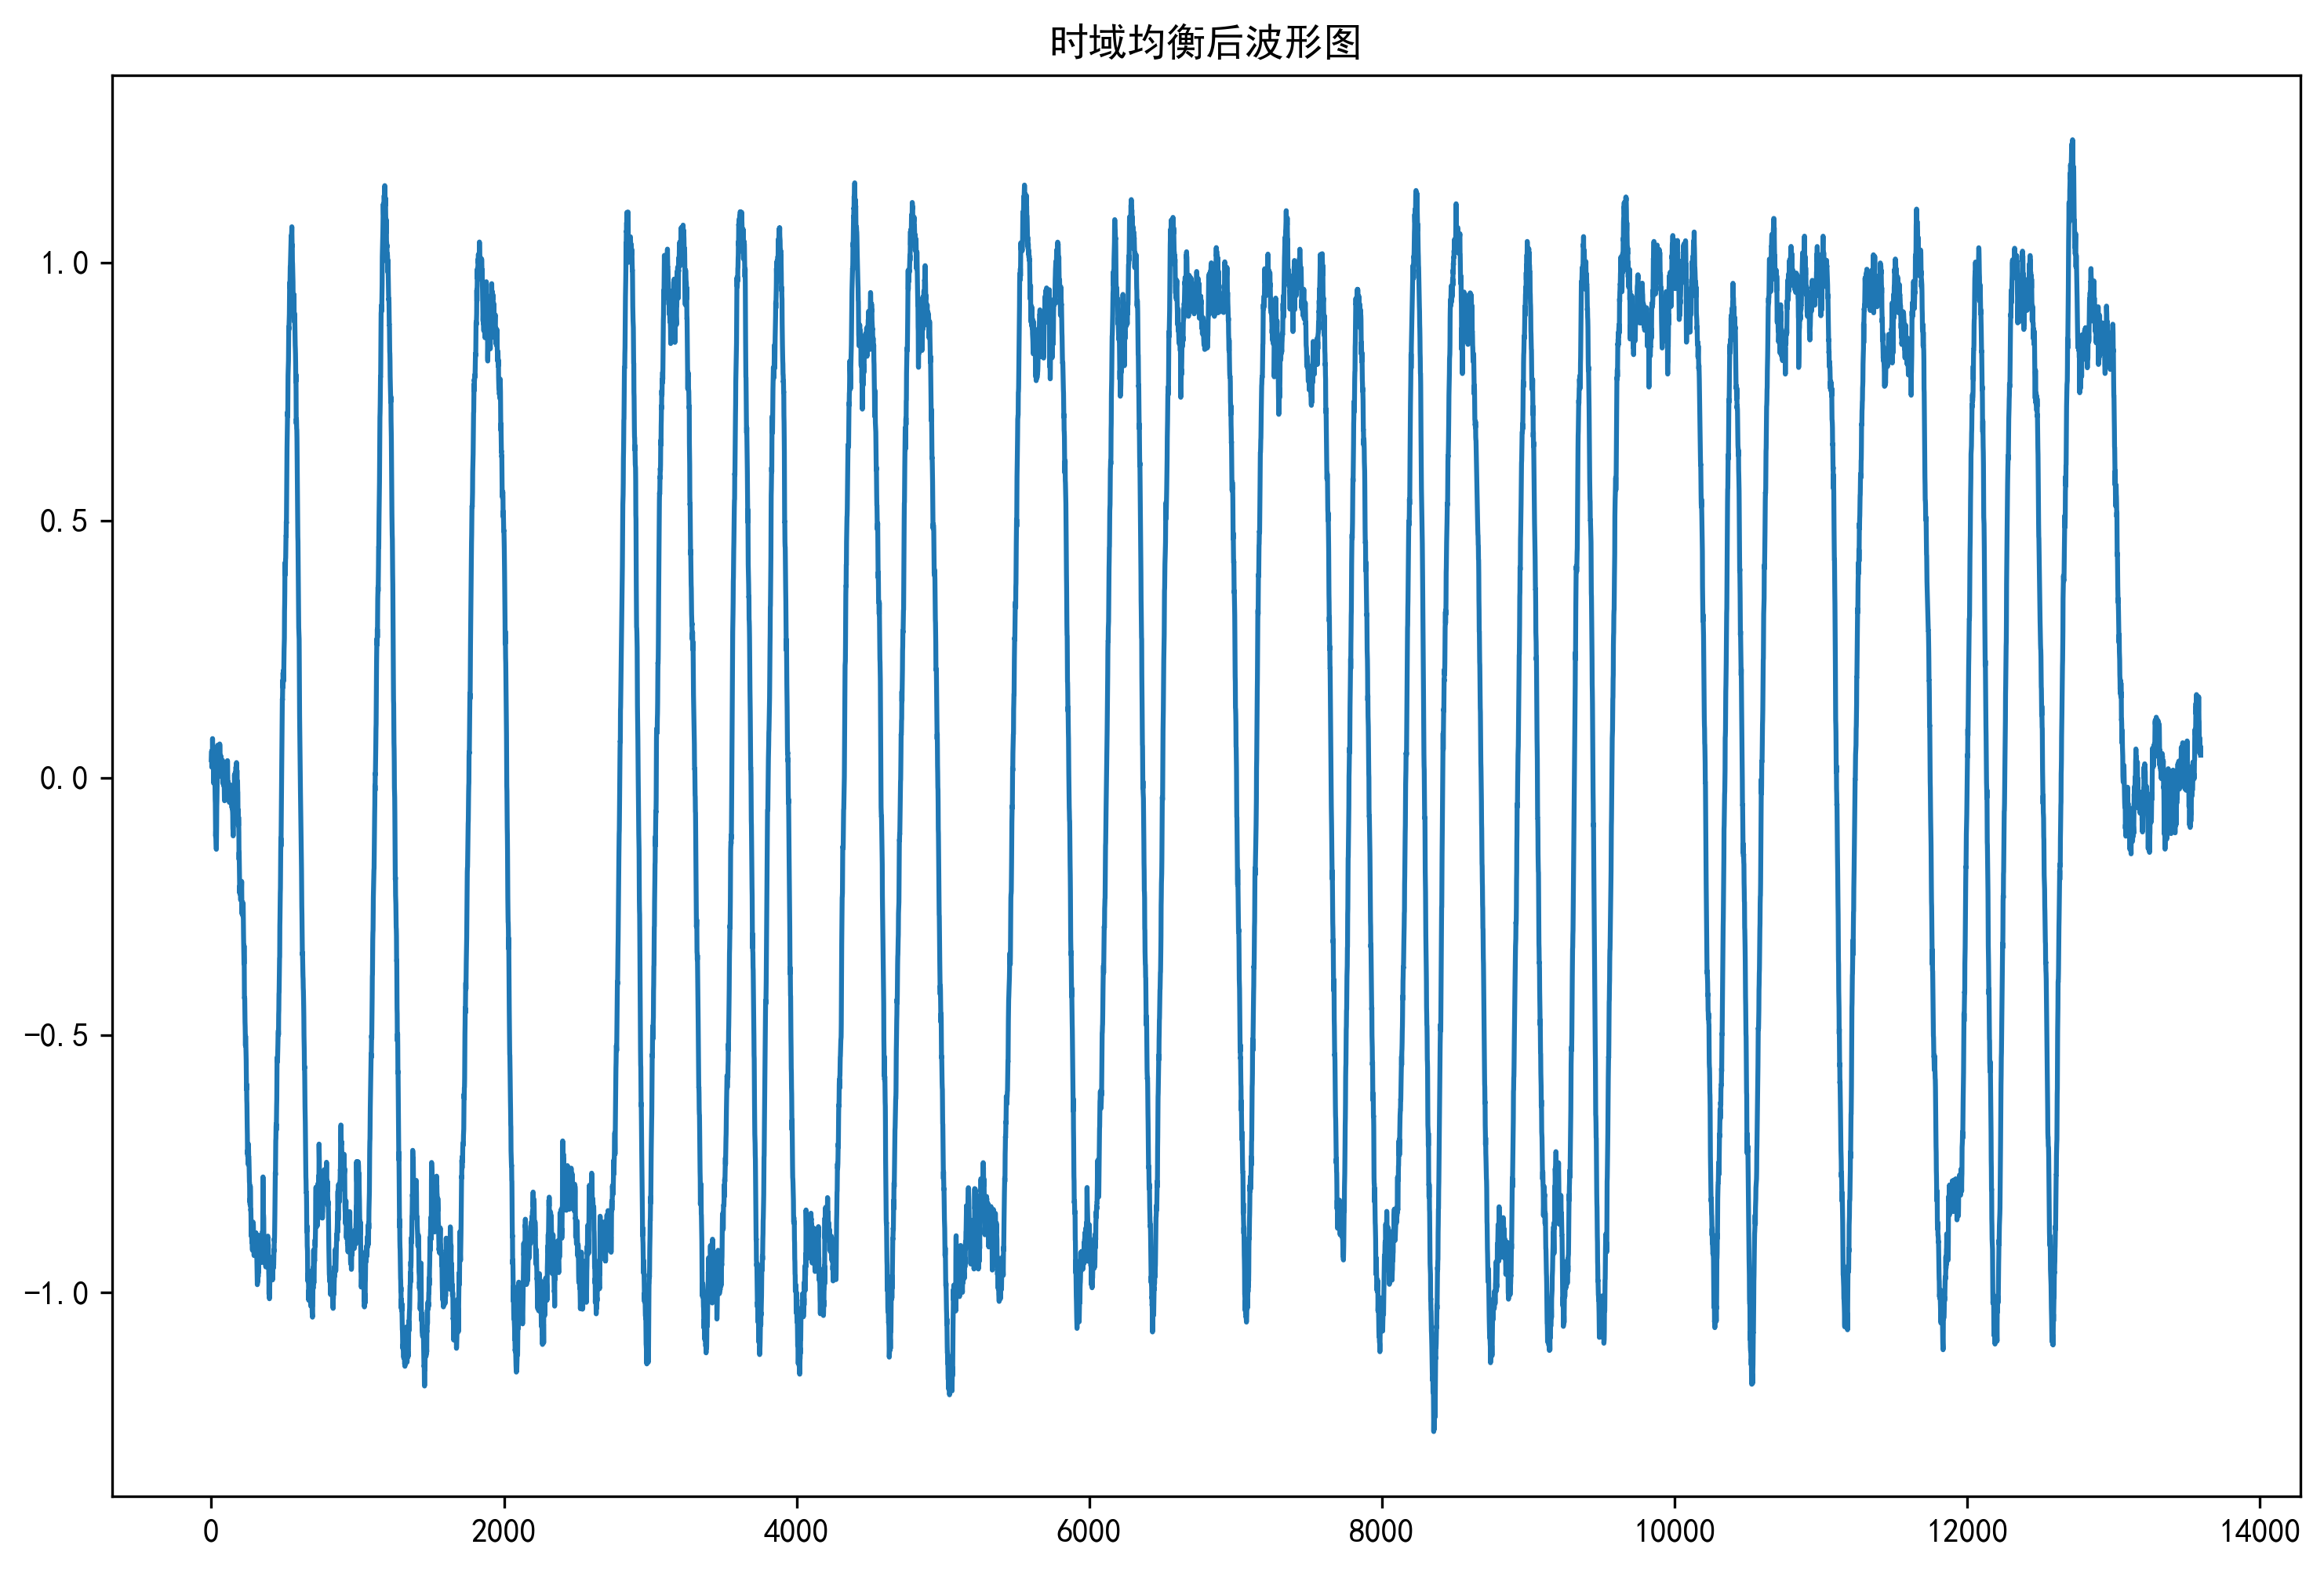

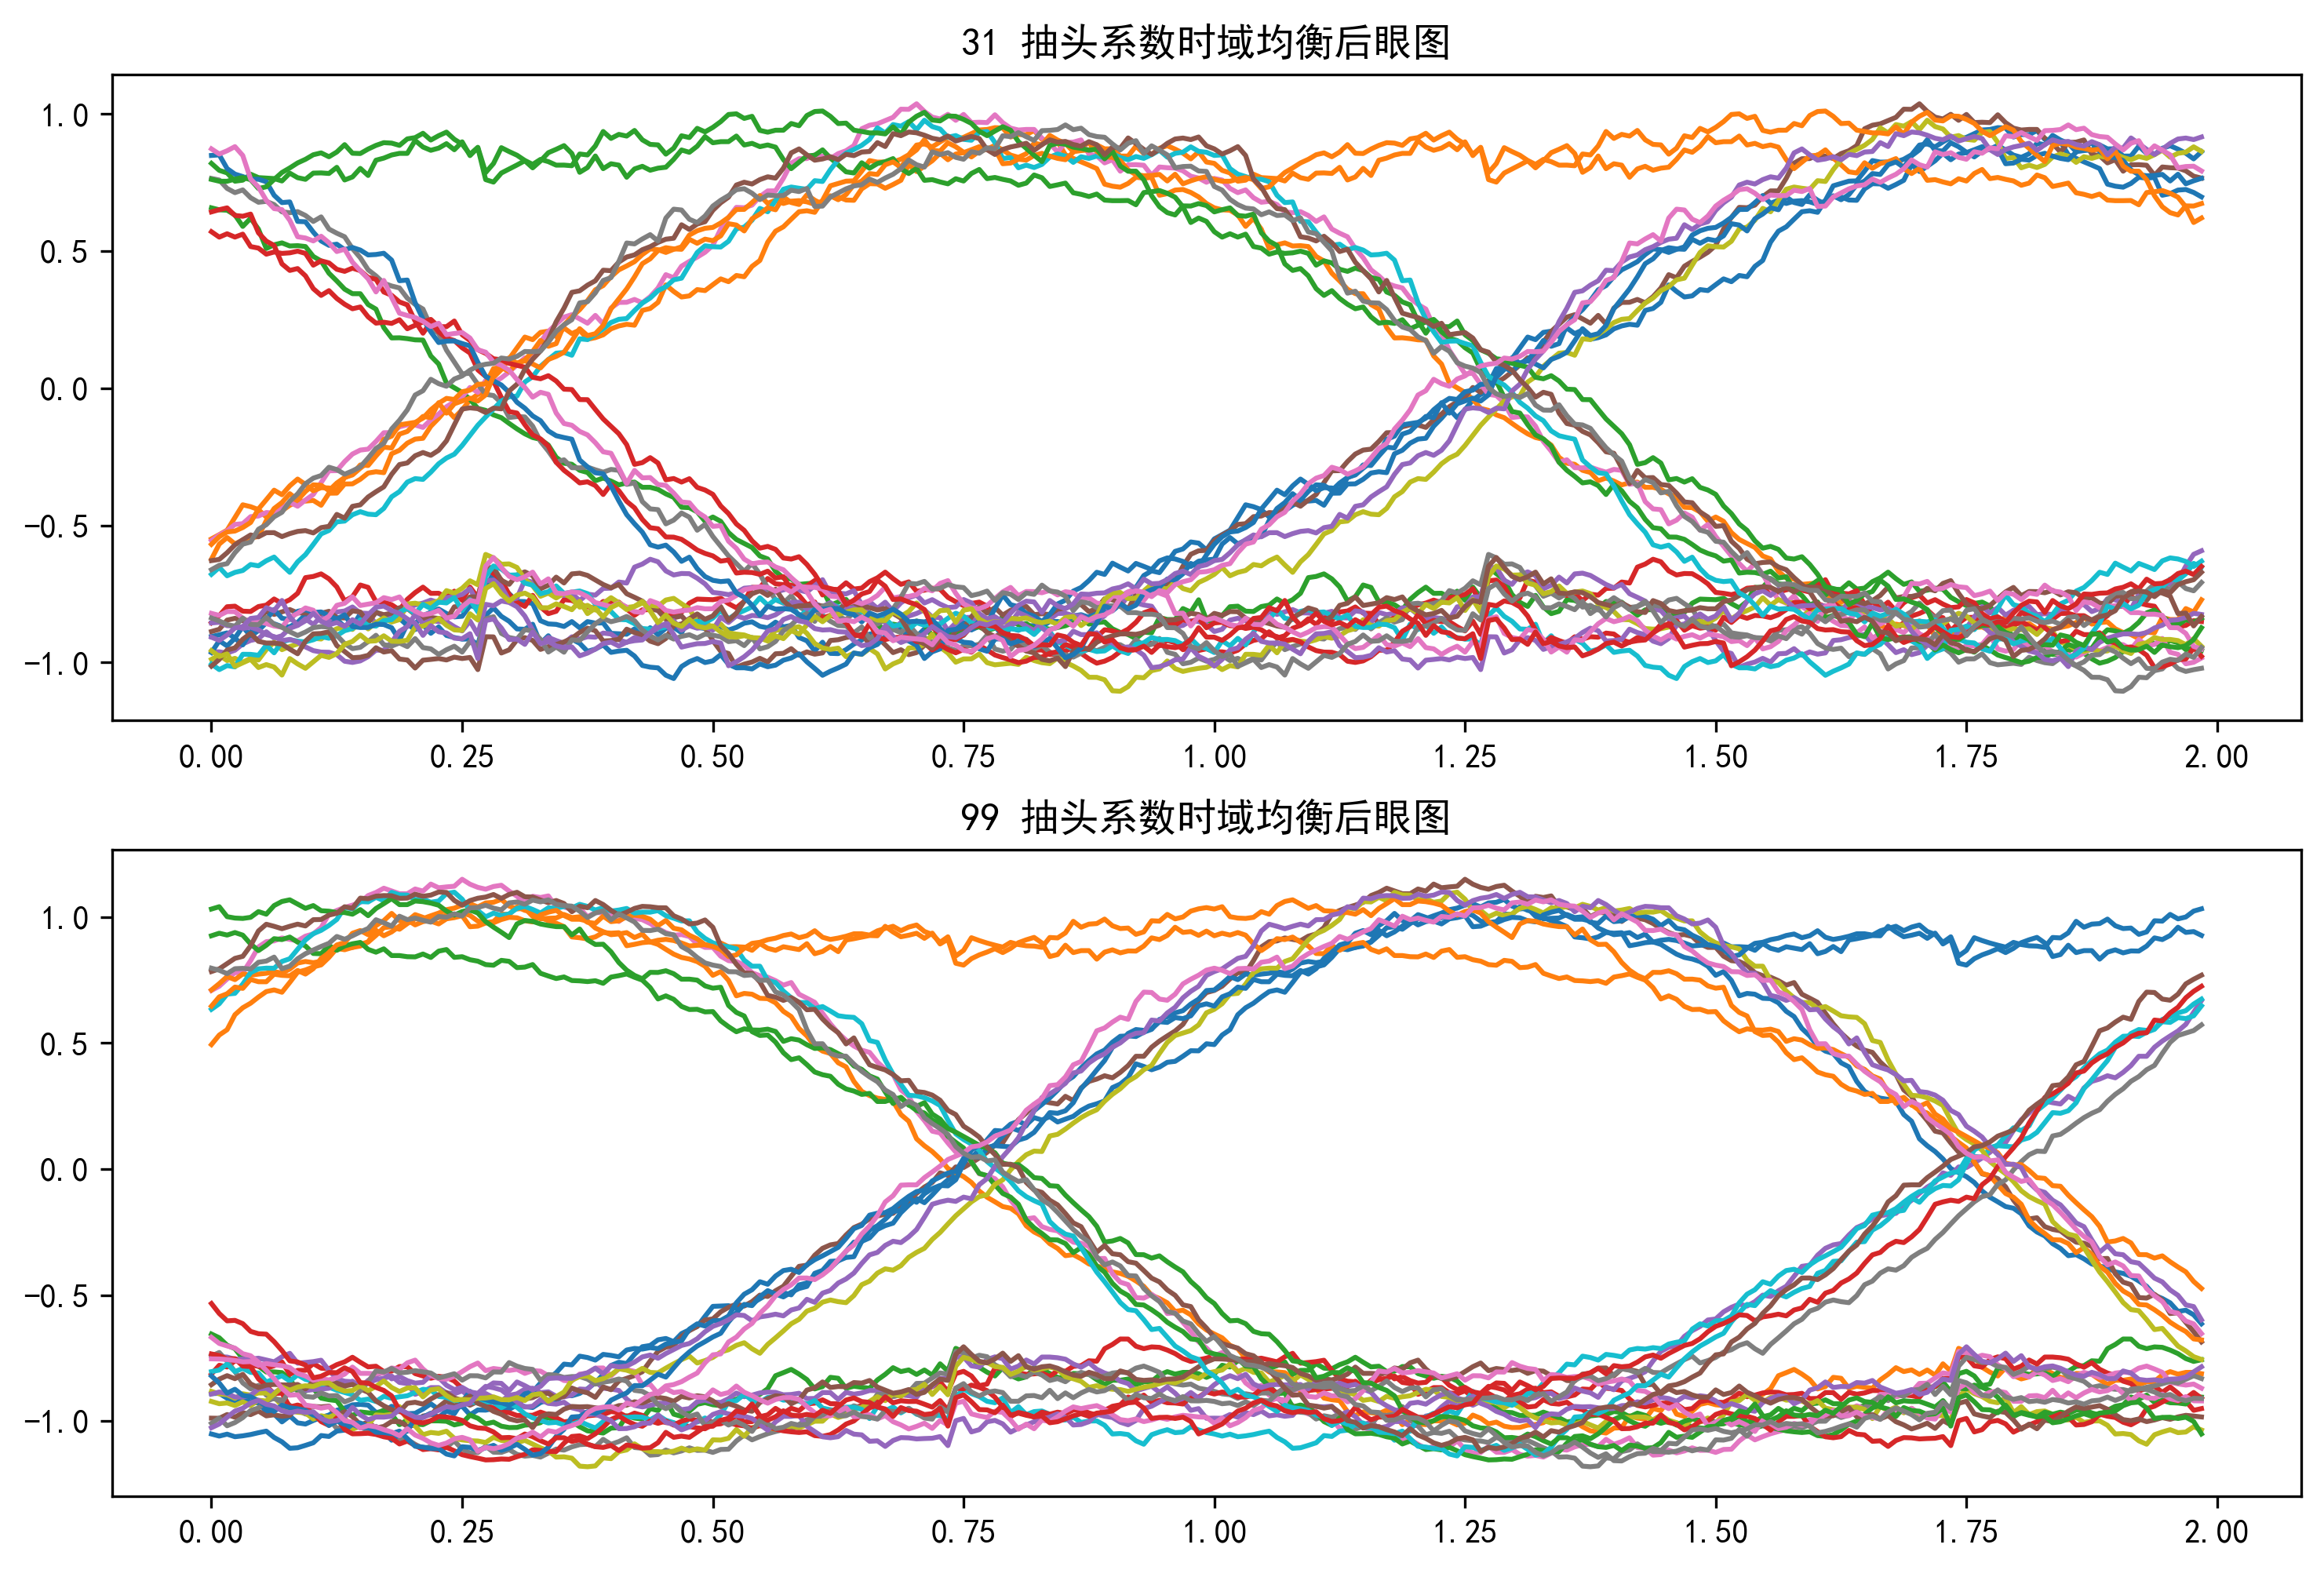

In [9]:
# ****************时域均衡 M 为 31*******************
M = 31
w2 = xishu(SNR, M)
NN = len(st)
out_m31 = []
for n in range(M, NN + 1):
    z1 = st_y[arange(n, n - M, -1)]
    out_m31.append(dot(w2.T, z1))
s4 = zeros((1, dot(eye_num, N_sample)))
ttt = arange(0, dot(dot(eye_num, N_sample), dt) - dt, dt)
for k in range(3, 30 + 1):
    s4 = out_m31[dot(k, N_sample) + 1: dot((k + eye_num), N_sample)]
    plt.figure(num=5, figsize=(12, 8), dpi=200)
    plt.subplot(211)
    plt.plot(ttt, s4)
    plt.title('31 抽头系数时域均衡后眼图')
# ****************时域均衡 M 为 99*******************
M = 99
w3 = xishu(SNR, M)
NN = len(st)
out_m99 = []
for n in range(M, NN + 1):
    z1 = st_y[arange(n, n - M, -1)]
    out_m99.append(dot(w3.T, z1))
plt.figure(num=6, figsize=(12, 8), dpi=200)
plt.plot(out_m99)
plt.title('时域均衡后波形图')

s5 = zeros((1, dot(eye_num, N_sample)))
ttt = arange(0, dot(dot(eye_num, N_sample), dt) - dt, dt)
for k in range(3, 30 + 1):
    s5 = out_m99[dot(k, N_sample) + 1:dot((k + eye_num), N_sample)]
    plt.figure(num=5, figsize=(12, 8), dpi=200)
    plt.subplot(212)
    plt.plot(ttt, s5)
    plt.title('99 抽头系数时域均衡后眼图')
plt.show()

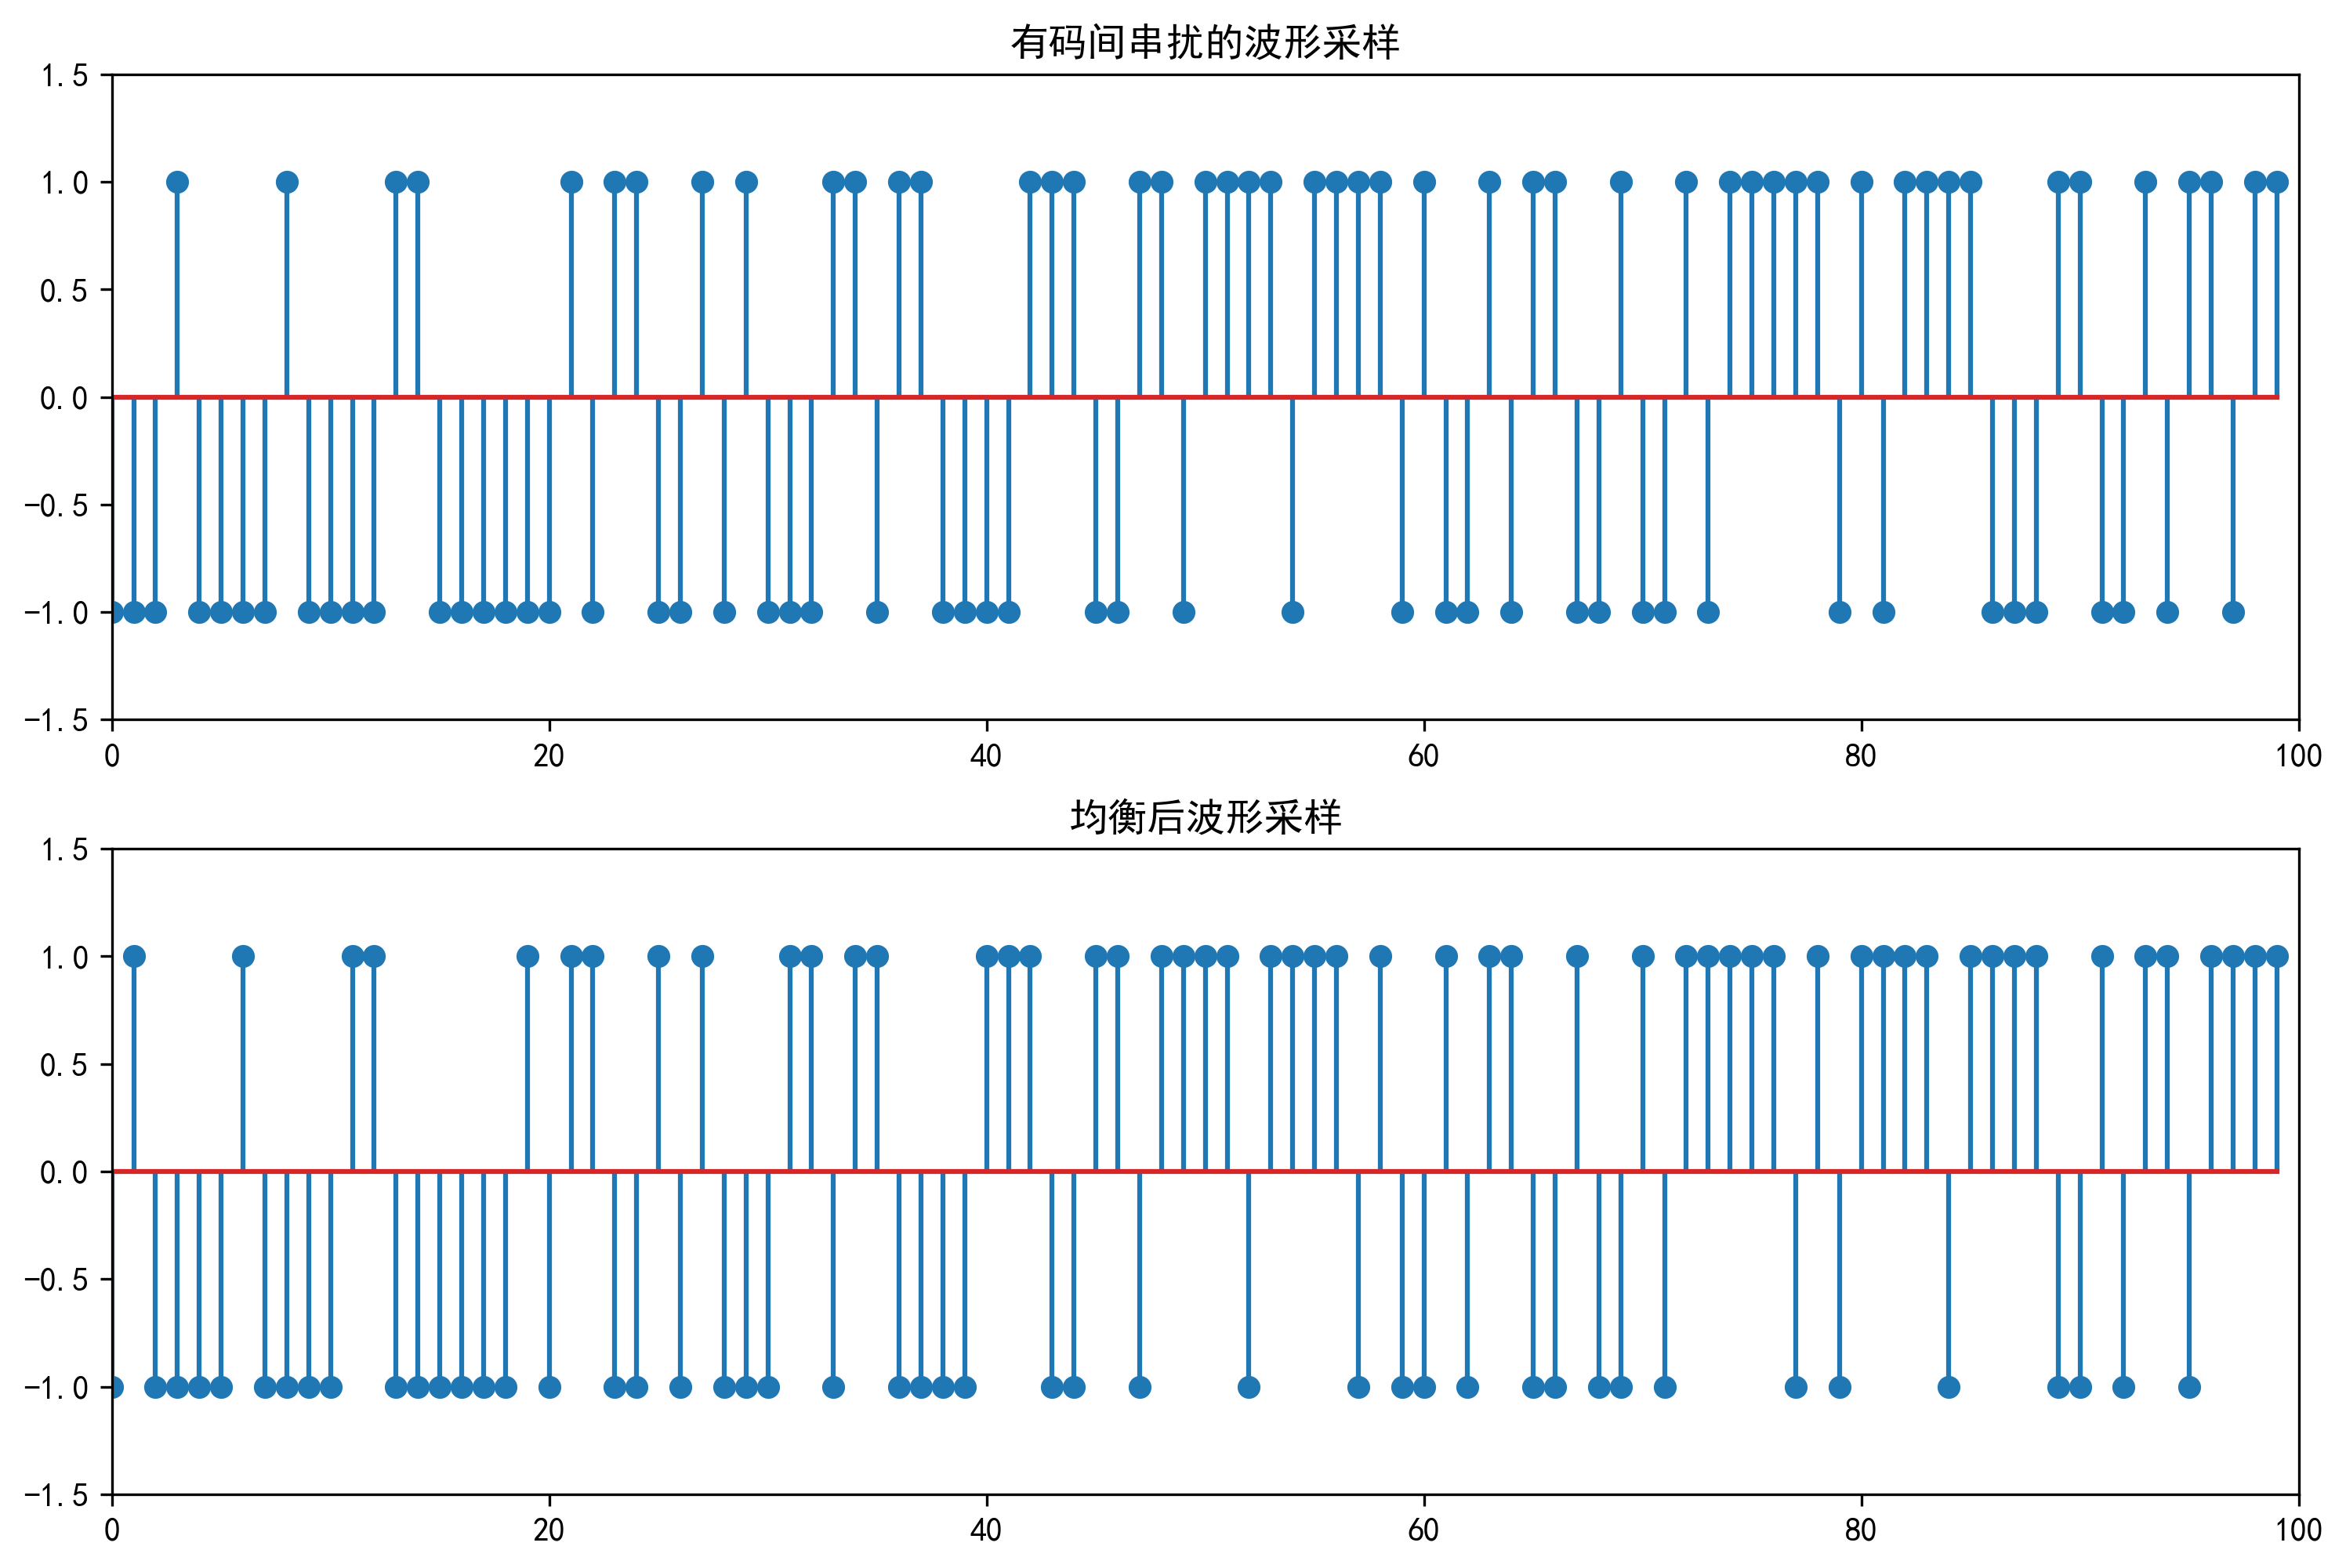

In [10]:
# ************抽样判决 and 误码率**************
receive = zeros(N_data)
for i in range(0, 100):
    receive[i] = st_y[dot(((i + 1) + 1), N_sample)]
    if receive[i] > 0:
        receive[i] = 1
    else:
        receive[i] = -1
plt.figure(num=7, figsize=(12, 8), dpi=200)
plt.subplot(211)
# plt.stem(receive, '.')
plt.stem(range(0, receive.size), receive, linefmt=".")
plt.title('有码间串扰的波形采样')
plt.axis([0, 100, -1.5, 1.5])
sum = 0
for i in range(0, 100):
    if receive[i] != d[i]:
        sum = sum + 1
receive99 = zeros(N_data)
for i in range(0, 100):
    receive99[i] = out_m99[dot(((i + 1) + 2), N_sample)]
    if receive99[i] > 0:
        receive99[i] = 1
    else:
        receive99[i] = -1
plt.figure(num=7, figsize=(12, 8), dpi=200)
plt.subplot(212)
plt.stem(range(0, receive99.size), receive99, linefmt=".")
plt.title('均衡后波形采样')
plt.axis([0, 100, -1.5, 1.5])
plt.show()

In [151]:
import time


def time_convert(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

In [152]:
from matplotlib import font_manager, ticker


def settick():
    '''
    对刻度字体进行设置，让上标的符号显示正常
    :return: None
    '''
    ax1 = plt.gca()  # 获取当前图像的坐标轴

    # 更改坐标轴字体，避免出现指数为负的情况
    tick_font = font_manager.FontProperties(family='DejaVu Sans')
    for labelx in ax1.get_xticklabels():
        labelx.set_fontproperties(tick_font)  #设置 x轴刻度字体
    for labely in ax1.get_yticklabels():
        labely.set_fontproperties(tick_font)  #设置 y轴刻度字体
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # x轴刻度设置为整数
    plt.tight_layout()

In [124]:
from awgn import awgn
from conv import conv
from sigexpand import sigexpand


def send_wuma(SNR, w, N_data_2, M):
    '''

    :param SNR:
    :param w:
    :param M:
    :return:
    '''
    eps = finfo(float).eps

    global d
    global st
    global t
    global tt
    global sum
    global N_data
    global N_sample
    global sum_2
    global sum_3
    global st_2
    # global N_data_2

    Ts_2 = 1
    N_sample_2 = 128
    eye_num_2 = 5
    alpha_2 = 1
    # N_data_2 = 10000
    dt_2 = Ts_2 / N_sample_2
    t_2 = arange(dot(-3, Ts_2), dot(3, Ts_2) + 1, dt_2)
    # 产生双极性数字信号
    d_2 = sign(random.randn(N_data_2))
    dd_2 = sigexpand(d_2, N_sample_2)
    # 基带系统冲击响应
    ht_2 = multiply(sinc(t_2 / Ts_2), (cos(dot(dot(alpha_2, pi), t_2) / Ts_2))) / (
            1 - dot(dot(4, alpha_2 ** 2), t_2 ** 2) / Ts_2 ** 2 + eps)
    st_2 = conv(dd_2, ht_2)
    tt_2 = arange(dot(-3, Ts_2), dot(dot((N_data_2 + 3), N_sample_2), dt_2) - dt_2 + 1, dt_2)
    H_2 = isi(st_2)
    t_H_2 = arange(-3, 10003.9921875 + 1, dt_2)
    # 加入噪声得信号st_y
    st_y_2 = awgn(H_2, SNR)
    # 时域均衡
    # M = 31
    NN = len(st_2)
    out_2 = [None] * (NN + 2)
    # print(M, NN + 1)
    for n in range(M, NN + 1):
        # num = ((n - M) / (NN + 1 - M)) * 100
        # print("\r{:^3.0f}% ".format(num), end=' ')
        z1 = st_y_2[arange(n, n - M, -1)]
        # print(w.shape)
        # print(z1.shape)
        out_2[n] = dot(w.T, z1)

    # 时域均衡前进行抽样判决，并求误码率
    receive_2 = zeros(N_data_2)
    for i in range(0, N_data_2):
        receive_2[i] = st_y_2[dot(((i + 1) + 2), N_sample_2)]
        if receive_2[i] > 0:
            receive_2[i] = 1
        else:
            receive_2[i] = -1

    sum_2 = 0
    for i in range(0, N_data_2):
        if receive_2[i] != d_2[i]:
            sum_2 = sum_2 + 1

    # 时域均衡后进行抽样判决，并求误码率
    receive_3 = zeros(N_data_2)
    sum_3 = 0
    for i in range(0, N_data_2):
        receive_3[i] = out_2[dot(((i + 1) + 2), N_sample_2)]
        if receive_3[i] > 0:
            receive_3[i] = 1
        else:
            receive_3[i] = -1
        if receive_3[i] != d_2[i]:
            sum_3 = sum_3 + 1

In [3]:
N_data_2 = 100000

In [156]:
import time

sstart_time = time.time()
SNR_error = zeros(37)
error_rate = zeros(37)
SNR_error_rls_7 = zeros(37)
error_rate_rls_7 = zeros(37)
for SNR in range(-15, 18 + 1, 1):
    start_time = time.time()
    print("{} :{}/{} :".format(SNR, SNR + 15 + 1, 18 + 15 + 1))
    sum_1 = 0
    sum_rls = 0
    # N_data_2 = 100000
    # print(w1.shape)
    w4 = copy(w1)
    M = 7
    for n in range(0, 10):
        print("\r\t{}/{}  ".format(n + 1, 10), end=' ')
        send_wuma(SNR, w4, N_data_2, M)
        sum_1 = sum_1 + sum_2
        sum_rls = sum_rls + sum_3
    print()
    error_sum = sum_1 / 10
    error_sum_rls = sum_rls / 10
    SNR_error[SNR + 16] = SNR
    error_rate[SNR + 16] = error_sum / N_data_2
    SNR_error_rls_7[SNR + 16] = SNR
    error_rate_rls_7[SNR + 16] = error_sum_rls / N_data_2
    end_time = time.time()
    print("运行时间为" + str(time_convert(end_time - start_time)) + "s")
send_time = time.time()
print("总运行时间为" + str(time_convert(send_time - sstart_time)) + "s")


-15 :1/34 :
	10/10   
运行时间为00:14:21s
-14 :2/34 :
	10/10   
运行时间为00:13:20s
-13 :3/34 :
	10/10   
运行时间为00:13:12s
-12 :4/34 :
	10/10   
运行时间为00:13:10s
-11 :5/34 :
	10/10   
运行时间为00:13:04s
-10 :6/34 :
	10/10   
运行时间为00:13:02s
-9 :7/34 :
	10/10   
运行时间为00:12:54s
-8 :8/34 :
	10/10   
运行时间为00:12:41s
-7 :9/34 :
	10/10   
运行时间为00:13:02s
-6 :10/34 :
	10/10   
运行时间为00:13:07s
-5 :11/34 :
	10/10   
运行时间为00:12:54s
-4 :12/34 :
	10/10   
运行时间为00:12:49s
-3 :13/34 :
	10/10   
运行时间为00:12:49s
-2 :14/34 :
	10/10   
运行时间为00:13:23s
-1 :15/34 :
	10/10   
运行时间为00:12:53s
0 :16/34 :
	10/10   
运行时间为00:13:14s
1 :17/34 :
	10/10   
运行时间为00:13:43s
2 :18/34 :
	10/10   
运行时间为00:13:55s
3 :19/34 :
	10/10   
运行时间为00:13:25s
4 :20/34 :
	10/10   
运行时间为00:13:02s
5 :21/34 :
	10/10   
运行时间为00:12:55s
6 :22/34 :
	10/10   
运行时间为00:13:27s
7 :23/34 :
	10/10   
运行时间为00:13:21s
8 :24/34 :
	10/10   
运行时间为00:13:15s
9 :25/34 :
	10/10   
运行时间为00:13:00s
10 :26/34 :
	10/10   
运行时间为00:13:15s
11 :27/34 :
	10/10   
运行时间为00:13:13s
12 :28/34 :
	1

In [157]:
savetxt("data/SNR_error_" + str(N_data_2) + ".txt", SNR_error)

In [158]:
savetxt("data/error_rate_" + str(N_data_2) + ".txt", error_rate)

In [159]:
savetxt("data/SNR_error_rls_7_" + str(N_data_2) + ".txt", SNR_error_rls_7)

In [160]:
savetxt("data/error_rate_rls_7_" + str(N_data_2) + ".txt", error_rate_rls_7)

In [161]:
# ************时域均衡前抽样判决\误码率曲线图,M 为 31**************
sstart_time = time.time()
SNR_error_rls_31 = zeros(37)
error_rate_rls_31 = zeros(37)
for SNR in range(-15, 18 + 1, 1):
    start_time = time.time()
    print("{} :{}/{} :".format(SNR, SNR + 15 + 1, 18 + 15 + 1))
    sum_1 = 0
    sum_rls = 0
    # N_data_2 = 100000
    w4 = copy(w2)
    M = 31
    for n in range(0, 10):
        print("\r\t{}/{}  ".format(n + 1, 10), end=' ')
        send_wuma(SNR, w4, N_data_2, M)
        sum_1 = sum_1 + sum_2
        sum_rls = sum_rls + sum_3
    print()
    error_sum = sum_1 / 10
    error_sum_rls = sum_rls / 10
    SNR_error_rls_31[SNR + 16] = SNR
    error_rate_rls_31[SNR + 16] = error_sum_rls / N_data_2
    end_time = time.time()
    print("运行时间为" + str(time_convert(end_time - start_time)) + "s")
send_time = time.time()
print("总运行时间为" + str(time_convert(send_time - sstart_time)) + "s")

-15 :1/34 :
	10/10   
运行时间为00:13:23s
-14 :2/34 :
	10/10   
运行时间为00:13:16s
-13 :3/34 :
	10/10   
运行时间为00:13:16s
-12 :4/34 :
	10/10   
运行时间为00:13:21s
-11 :5/34 :
	10/10   
运行时间为00:13:33s
-10 :6/34 :
	10/10   
运行时间为00:13:14s
-9 :7/34 :
	10/10   
运行时间为00:13:06s
-8 :8/34 :
	10/10   
运行时间为00:13:24s
-7 :9/34 :
	10/10   
运行时间为00:13:21s
-6 :10/34 :
	10/10   
运行时间为00:13:29s
-5 :11/34 :
	10/10   
运行时间为00:13:26s
-4 :12/34 :
	10/10   
运行时间为00:13:16s
-3 :13/34 :
	10/10   
运行时间为00:13:30s
-2 :14/34 :
	10/10   
运行时间为00:13:06s
-1 :15/34 :
	10/10   
运行时间为00:13:21s
0 :16/34 :
	10/10   
运行时间为00:13:35s
1 :17/34 :
	10/10   
运行时间为00:13:25s
2 :18/34 :
	10/10   
运行时间为00:13:44s
3 :19/34 :
	10/10   
运行时间为00:13:16s
4 :20/34 :
	10/10   
运行时间为00:13:33s
5 :21/34 :
	10/10   
运行时间为00:13:08s
6 :22/34 :
	10/10   
运行时间为00:13:34s
7 :23/34 :
	10/10   
运行时间为00:13:12s
8 :24/34 :
	10/10   
运行时间为00:13:25s
9 :25/34 :
	10/10   
运行时间为00:13:34s
10 :26/34 :
	10/10   
运行时间为00:13:38s
11 :27/34 :
	10/10   
运行时间为00:13:49s
12 :28/34 :
	1

KeyboardInterrupt: 

In [ ]:
savetxt("data/SNR_error_rls_31_" + str(N_data_2) + ".txt", SNR_error_rls_31)

In [ ]:
savetxt("data/error_rate_rls_31_" + str(N_data_2) + ".txt", error_rate_rls_31)

In [ ]:
# ************时域均衡前抽样判决\误码率曲线图,M 为 99**************
sstart_time = time.time()
SNR_error_rls_99 = zeros(37)
error_rate_rls_99 = zeros(37)
for SNR in range(-15, 18 + 1, 1):
    start_time = time.time()
    print("{} :{}/{} :".format(SNR, SNR + 15 + 1, 18 + 15 + 1))
    sum_1 = 0
    sum_rls = 0
    # N_data_2 = 100000
    w4 = copy(w3)
    M = 99
    for n in range(0, 10):
        print("\r\t{}/{}  ".format(n + 1, 10), end=' ')
        send_wuma(SNR, w4, N_data_2, M)
        sum_1 = sum_1 + sum_2
        sum_rls = sum_rls + sum_3
    print()
    error_sum = sum_1 / 10
    error_sum_rls = sum_rls / 10
    SNR_error_rls_99[SNR + 16] = SNR
    error_rate_rls_99[SNR + 16] = error_sum_rls / N_data_2
    end_time = time.time()
    print("运行时间为" + str(time_convert(end_time - start_time)) + "s")
send_time = time.time()
print("总运行时间为" + str(time_convert(send_time - sstart_time)) + "s")

In [ ]:
savetxt("data/SNR_error_rls_99_" + str(N_data_2) + ".txt", SNR_error_rls_99)

In [ ]:
savetxt("data/error_rate_rls_99_" + str(N_data_2) + ".txt", error_rate_rls_99)

读取数据

In [4]:
SNR_error = loadtxt("data/SNR_error_" + str(N_data_2) + ".txt")

In [ ]:
error_rate_rls = loadtxt("data/error_rate_" + str(N_data_2) + ".txt")

In [ ]:
SNR_error_rls_7 = loadtxt("data/SNR_error_rls_7_" + str(N_data_2) + ".txt")

In [ ]:
error_rate_rls_7 = loadtxt("data/error_rate_rls_7_" + str(N_data_2) + ".txt")

In [ ]:
SNR_error_rls_31 = loadtxt("data/SNR_error_rls_31_" + str(N_data_2) + ".txt")

In [ ]:
error_rate_rls_31 = loadtxt("data/error_rate_rls_31_" + str(N_data_2) + ".txt")

In [ ]:
SNR_error_rls_99 = loadtxt("data/SNR_error_rls_99_" + str(N_data_2) + ".txt")

In [162]:
error_rate_rls_99 = loadtxt("data/error_rate_rls_99_" + str(N_data_2) + ".txt")

array([0.    , 0.1173, 0.0899, 0.0674, 0.0462, 0.0279, 0.0167, 0.0093,
       0.004 , 0.0015, 0.0004, 0.0002, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

In [ ]:
import matplotlib as mpl

# mpl.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         # "font.family": "sans-serif",
#         # "font.sans-serif": "SimHei",
#         'mathtext.fontset': 'stix'
#     }
# )
# plt.rcParams['font.sans-serif'] = ['SimHei']

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings

warnings.filterwarnings("ignore")

plt.figure(num=8, figsize=(12, 8), dpi=200)
plt.semilogy(SNR_error, error_rate)
plt.semilogy(SNR_error_rls_7, error_rate_rls_7)
plt.semilogy(SNR_error_rls_31, error_rate_rls_31)
plt.semilogy(SNR_error_rls_99, error_rate_rls_99)
plt.legend(['SNR_error_' + str(N_data_2), 'SNR_error_rls_7_' + str(N_data_2), 'SNR_error_rls_31_' + str(N_data_2),
            'SNR_error_rls_99_' + str(N_data_2)])
plt.xlim(-15, 15)
font = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 12,
}
plt.xlabel('r/dB', font)
plt.ylabel('Pe', font)
plt.title("有无均衡器时误码率随信噪比变化曲线")
settick()

plt.savefig("image/有无均衡器时误码率随信噪比变化曲线_" + str(N_data_2) + ".jpg")
plt.show()

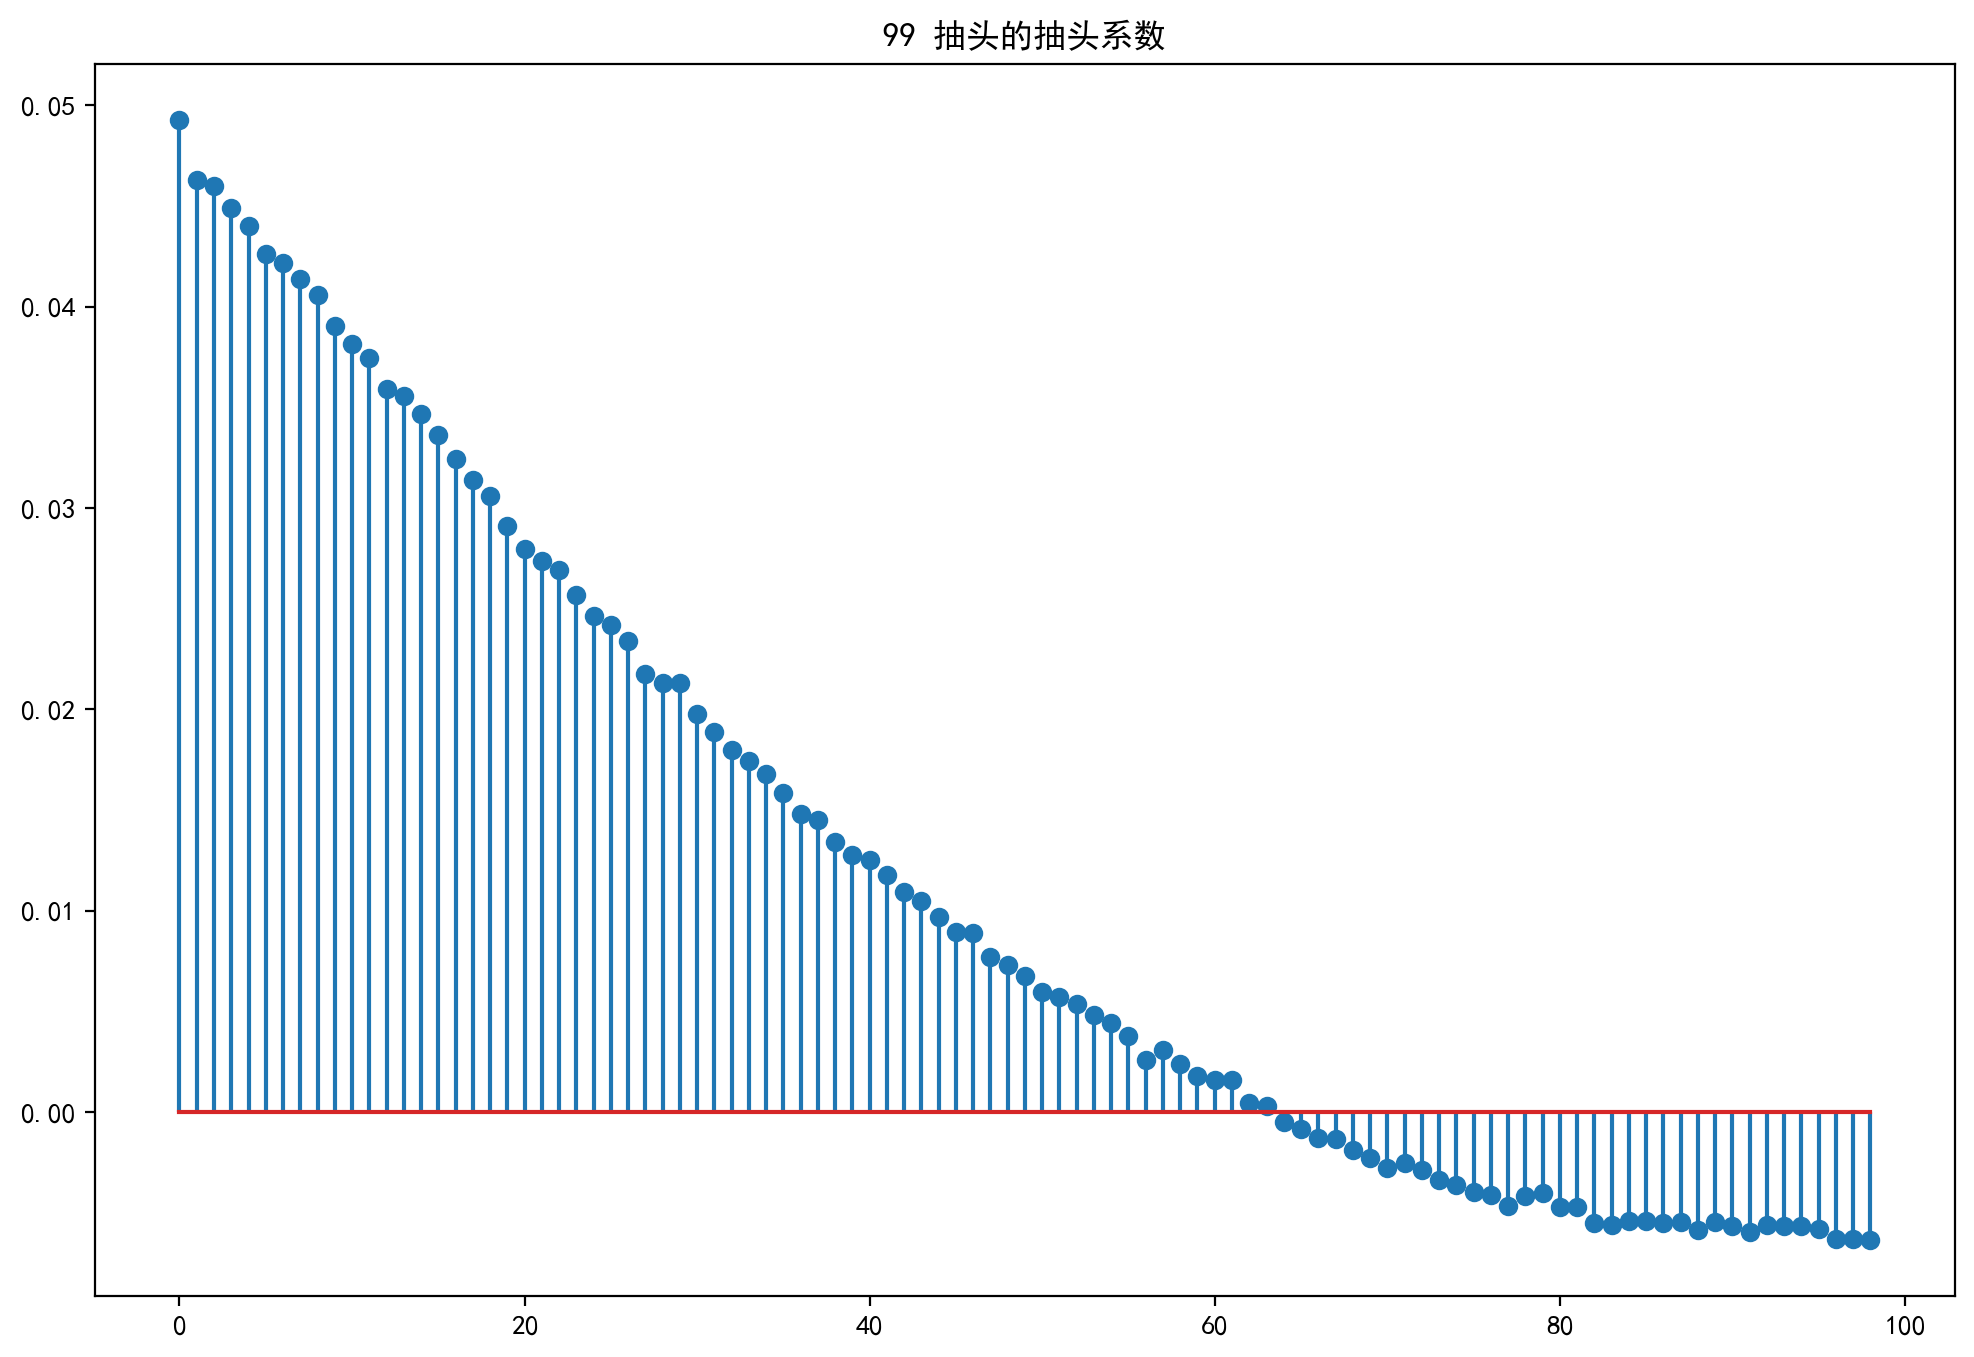

In [122]:
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(num=9, figsize=(12, 8), dpi=200)
# ax = plt.subplot(111)
plt.subplot(111)
plt.stem(range(0, w4.size), w4, linefmt=".")
# ax.set_title("99 抽头的抽头系数")
plt.title("99 抽头的抽头系数")
# plt.axis([0, 100, -0.01, 0.0])
plt.show()